In [36]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import plotly.express as px
#with open(path_to_protocol5, "Plotly-Dash/app.data") as fh
df = pd.read_pickle("Plotly-Dash/model_data.data")
df_graph=pd.read_pickle("Plotly-Dash/graph_data.data")
stack= pickle.load(open("Plotly-Dash/finalized_model_ri.sav", 'rb'))
stackO= pickle.load(open("Plotly-Dash/finalized_model_O.sav", 'rb'))
df_ud = pd.read_csv("Plotly-Dash/l2_detailed_listings.csv", encoding = "UTF-8")
df_am = pd.read_pickle('Plotly-Dash/amenity.data')

Trying to unpickle estimator KNNImputer from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator LinearRegression from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Lasso from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying 

In [16]:
from eli5 import explain_prediction
from eli5 import explain_weights
from sklearn.utils.validation import check_array
from eli5 import transform_feature_names
from sklearn.impute import KNNImputer
# @transform_feature_names.register(KNNImputer())
# def KNN_names(transformer, in_names=None):
#     if in_names is None:
#         from eli5.sklearn.utils import get_feature_names
#         # generate default feature names
#         in_names = get_feature_names(transformer, num_features=transformer.n_features_)
#     # return a list of strings derived from in_names
#     return in_names
feature_names=df.drop(["rental_income", "occupancy"], axis=1).columns.tolist()
explain_weights(stack.named_steps['R'], top=20, feature_names=feature_names)

Weight,Feature
0.4177 ± 0.1588,listing_weekend_price_native
0.1090 ± 0.0783,reviews_count
0.0935 ± 0.1336,price
0.0793 ± 0.1218,bedrooms
0.0398 ± 0.0983,person_capacity
0.0263 ± 0.0530,Dishwasher
0.0207 ± 0.0677,bathrooms
0.0135 ± 0.0366,security_deposit_native
0.0130 ± 0.0284,picture_count
0.0126 ± 0.0334,cleaning_fee_native


In [61]:
pred = pd.DataFrame(np.zeros((1,len(df.columns.drop(["rental_income","occupancy"])))),columns=df.drop(["rental_income","occupancy"],axis=1).columns)
pred.iloc[0]=stack.named_steps['imputer'].transform(pred)
fig=explain_prediction(stack.named_steps['R'], pred.iloc[0] ,top=20, feature_names = feature_names)
fig

Explanation(estimator='RandomForestRegressor(max_depth=5, n_estimators=9000)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1867.0333656890086, std=None, value=1.0), FeatureWeight(feature='check_out_time', weight=13.386975122027168, std=None, value=0.0), FeatureWeight(feature='monthly_price_factor', weight=6.2430513094941595, std=None, value=0.0)], neg=[FeatureWeight(feature='listing_weekend_price_native', weight=-409.9158272489346, std=None, value=0.0), FeatureWeight(feature='reviews_count', weight=-296.6493657978872, std=None, value=0.0), FeatureWeight(feature='price', weight=-166.08758182132243, std=None, value=0.0), FeatureWeight(feature='Dishwasher', weight=-89.91269661556817, std=None, value=0.0), FeatureWeight(feature='property_count', weight=-14.256833949679459, std=None, value=0.0), FeatureWeight(feature='neighborhood__Center City', weight=-12.212852134463736, std=None, value=0.0), FeatureWeight(feature='bedrooms', weight=-11.006125773526994, std=None, value=0.0), FeatureWeight(feature='person_capacity', weight=-10.850692297527875, std=None, value=0.0), FeatureWeight(feature='Smoke alarm', weight=-9.03273553786761, std=None, value=0.0), FeatureWeight(feature='cleaning_fee_native', weight=-8.32181091275969, std=None, value=0.0), FeatureWeight(feature='Carbon monoxide alarm', weight=-5.855549142723168, std=None, value=0.0), FeatureWeight(feature='bathrooms', weight=-5.725190397983296, std=None, value=0.0), FeatureWeight(feature='Wifi', weight=-5.60688574188481, std=None, value=0.0), FeatureWeight(feature='picture_count', weight=-5.217017362073509, std=None, value=0.0), FeatureWeight(feature='property_type__Condominium', weight=-4.319645751222141, std=None, value=0.0), FeatureWeight(feature='min_nights', weight=-3.3494065496977523, std=None, value=0.0), FeatureWeight(feature='guests_included', weight=-3.0617679274108722, std=None, value=0.0)], pos_remaining=30, neg_remaining=97), proba=None, score=805.1863091354825, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [21]:
from eli5.formatters.html import format_as_html
format_as_html(fig)

'\n    <style>\n    table.eli5-weights tr:hover {\n        filter: brightness(85%);\n    }\n</style>\n\n\n\n    \n        <p>Explained as: decision path</p>\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n        \n        <pre>\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, t

In [82]:
pd.set_option('display.max_columns', None)
np.all(df_graph.dtypes=='float64')

True

In [65]:
stack.named_steps['R'].predict(df_graph.drop(['rental_income','occupancy'], axis=1))

array([2688.87425524, 1301.51656179, 1883.6005658 , ..., 1704.05694064,
       1836.73888074, 2055.96386917])

RandomForestRegressor(max_depth=5, n_estimators=9000)

In [76]:
import alibi
alibi.__version__

'0.5.6'

In [77]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale
feature_names=df_graph.drop(["rental_income", "occupancy"], axis=1).columns.tolist()
ale=ALE(lambda x: stack.named_steps['R'].predict(x), feature_names=feature_names, target_names=['Rental Income'])

In [78]:
exp = ale.explain(df_graph.drop(["occupancy", "rental_income"], axis=1))
plot_ale(exp)

TypeError: '(slice(None, None, None), 0)' is an invalid key

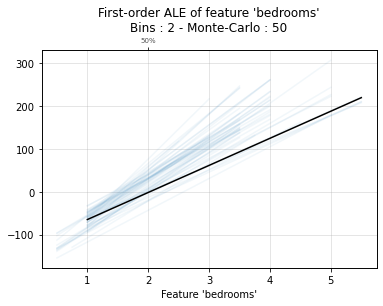

In [61]:
import io
buf = io.BytesIO()
ale_plot(model=stack,train_set= df.drop(["occupancy", "rental_income"], axis=1), 
         features= 'bedrooms',bins=2, monte_carlo=True).get_figure().savefig(buf, format='png')

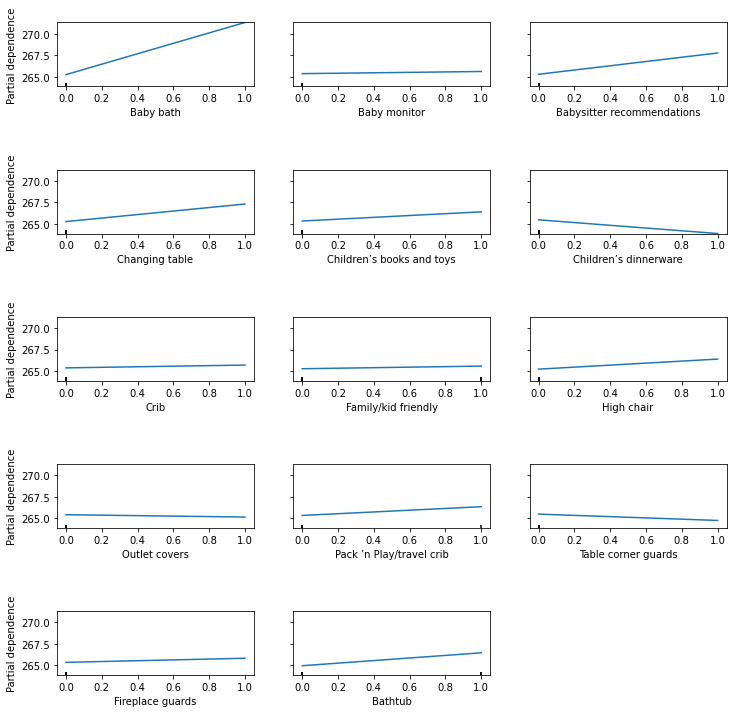

In [163]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
features = df_am.columns.to_list()
features.remove('Other')
features.remove('translation missing: en.hosting_amenity_49')
features.remove('translation missing: en.hosting_amenity_50')



_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=["Baby bath","Baby monitor","Babysitter recommendations",
                          "Changing table","Children’s books and toys","Children’s dinnerware",
                          "Crib","Family/kid friendly" ,"High chair","Outlet covers",
                          "Pack ’n Play/travel crib",
                          "Table corner guards","Fireplace guards","Bathtub"],
                               ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis

plot.figure_.subplots_adjust(hspace=1.3)
#plot.FacetGrid()

Accessible-height bed
Accessible-height toilet
Elevator
Extra space around bed
Flat path to guest entrance
No stairs or steps to enter
Wheelchair accessible
Wide entrance
Wide clearance to shower
Wide entrance for guests
Wide hallways


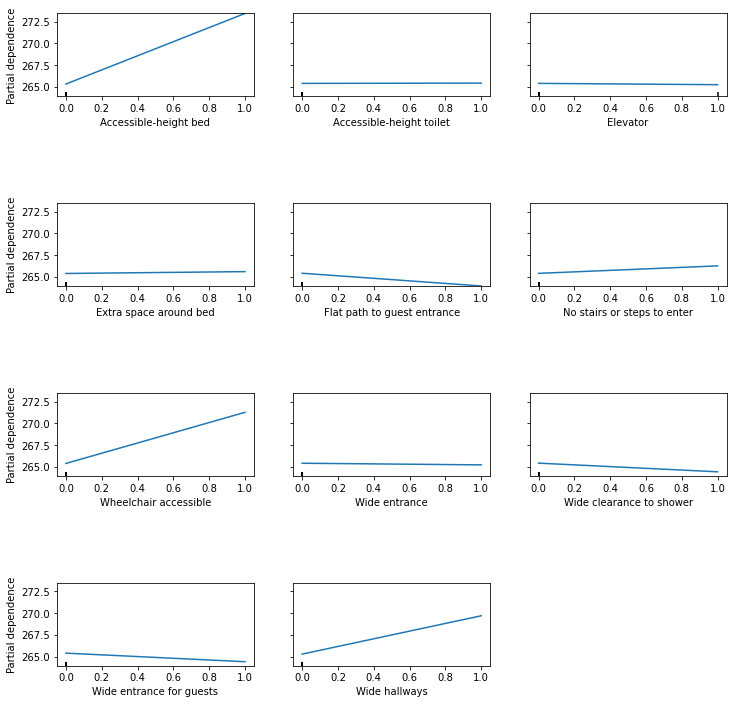

In [169]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
features = df_am.columns.to_list()
features.remove('Other')
features.remove('translation missing: en.hosting_amenity_49')
features.remove('translation missing: en.hosting_amenity_50')
accCols = ["Accessible-height bed" ,"Accessible-height toilet",
                           "Elevator", "Extra space around bed", "Fixed grab bars for shower",
                           "Flat path to guest entrance", "Handheld shower head",
                           "No stairs or steps to enter", "Roll in shower", 
                           "Wheelchair accessible", "Well lit path to entrance", "Wide entrance",
                           "Wide doorway to guest bathroom", "Wide clearance to shower", 
                           "Wide entrance for guests" ,"Wide entryway", "Wide hallways"]
accTheres = []
for col in accCols:
    if col in df.columns:
        print(col)
        accTheres.append(col)


_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=accTheres,
       ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis

plot.figure_.subplots_adjust(hspace=1.3)
print(plot)

Shampoo
Shower gel
Conditioner
Extra pillows and blankets
Hair dryer
Hangers
Iron
Private entrance
Private living room
Lock on bedroom door
Air conditioning
Heating
Portable fans
Ceiling fan
Laundromat nearby
Hot water
Ethernet connection
Pocket wifi
Laptop friendly workspace
TV
Cable TV
Sound system
Indoor fireplace


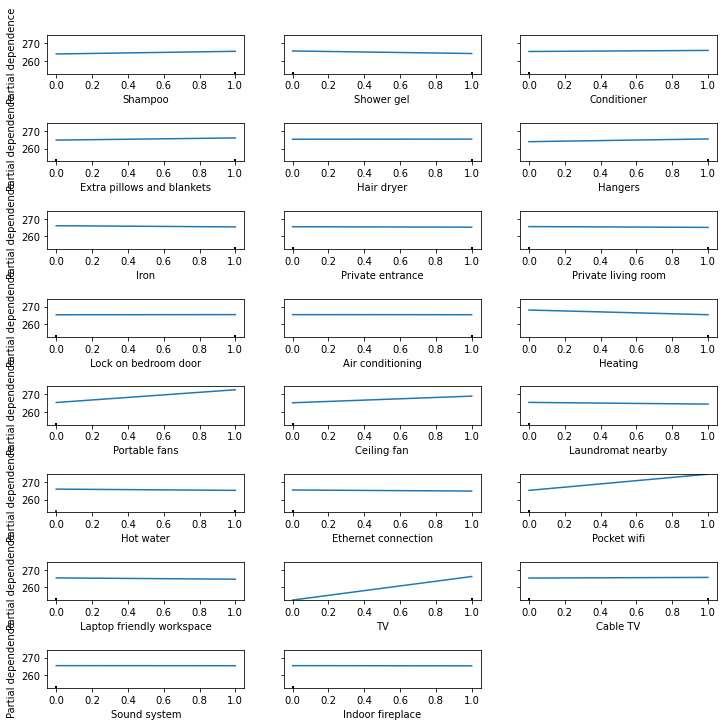

In [170]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

esCols = ["Shampoo", "Shower gel", "Conditioner", "Extra pillows and blankets", "Hair dryer" , 
                           "Hangers", "Iron", "Private entrance", "Private living room", "Lock on bedroom door", 
                           "Air conditioning", "Heating", "Portable fans", "Ceiling fan","Laundromat nearby","Hot water",
                           "Ethernet connection","Pocket wifi","Laptop friendly workspace" ,
                           "TV","Cable TV","Record player","Sound system","Indoor fireplace"]
esTheres = []
for col in accCols:
    if col in df.columns:
        #print(col)
        esTheres.append(col)


_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=esTheres,
       ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis

plot.figure_.subplots_adjust(hspace=1.3)
print(plot)

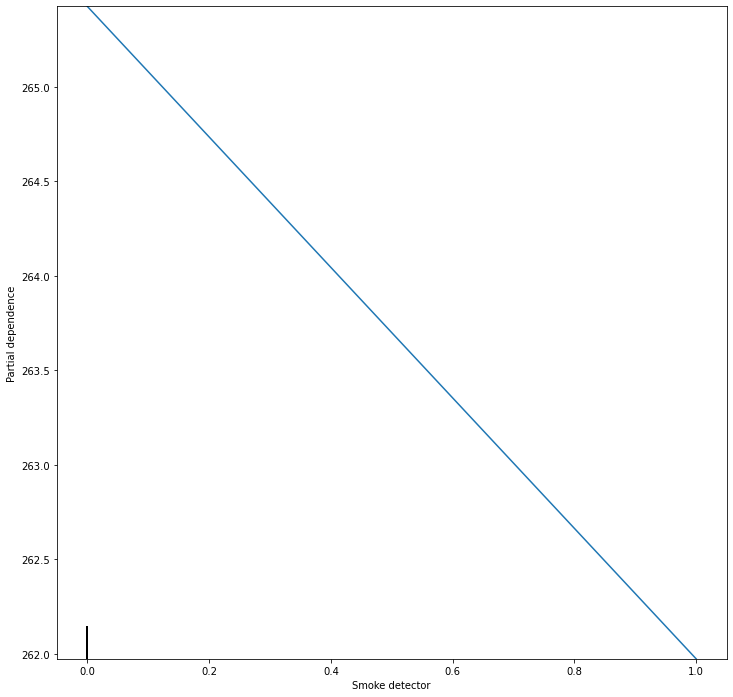

In [184]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

esCols = ["Shampoo", "Shower gel", "Conditioner", "Extra pillows and blankets", "Hair dryer" , 
                           "Hangers", "Iron", "Private entrance", "Private living room", "Lock on bedroom door", 
                           "Air conditioning", "Heating", "Portable fans", "Ceiling fan","Laundromat nearby","Hot water",
                           "Ethernet connection","Pocket wifi","Laptop friendly workspace" ,
                           "TV","Cable TV","Record player","Sound system","Indoor fireplace"]
esTheres = []
for col in accCols:
    if col in df.columns:
        #print(col)
        esTheres.append(col)


_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=["Smoke detector"],
       ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis

plot.figure_.subplots_adjust(hspace=1.3)
print(plot)

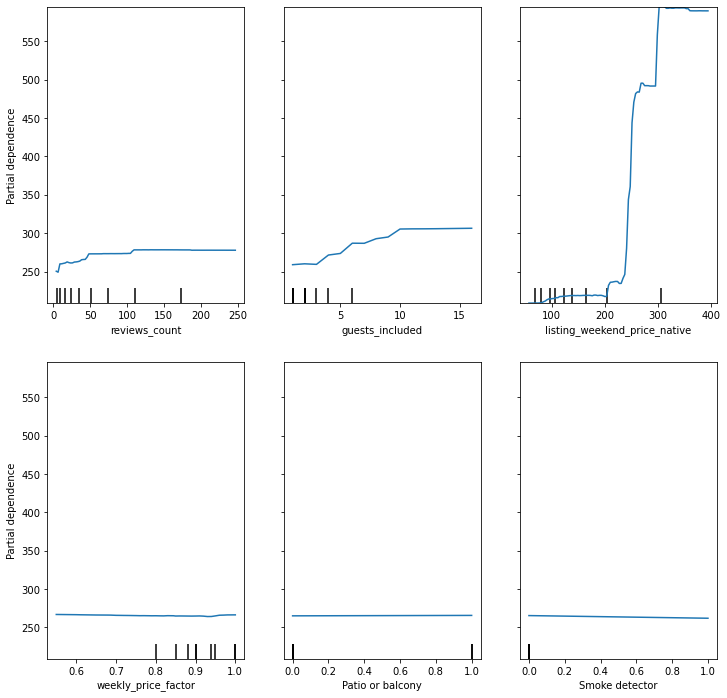

In [179]:
_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=['reviews_count',
   'guests_included',
   'listing_weekend_price_native',
   'weekly_price_factor',
   'Patio or balcony',
   'Smoke detector'],
       ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis


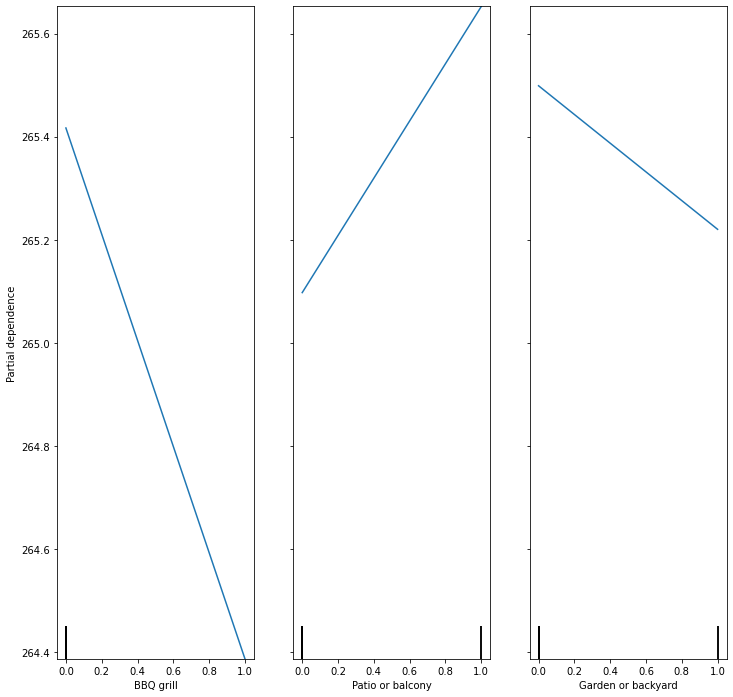

In [174]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

oCols = ["BBQ grill", "Patio or balcony", "Garden or backyard"]
oTheres = []
for col in oCols:
    if col in df.columns:
        #print(col)
        oTheres.append(col)


_,ax = plt.subplots(figsize = (12,12))
plot = plot_partial_dependence(stack,     
   X=df.drop(["occupancy"], axis = 1), # raw predictors data.
       features=oTheres,
       ax=ax# column numbers of plots we want to show
       #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
       #grid_resolution=10,
        ) # number of values to plot on x axis

plot.figure_.subplots_adjust(hspace=1.3)
print(plot)

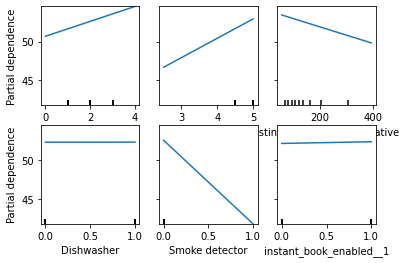

In [180]:
from sklearn.inspection import plot_partial_dependence
features = ['bedrooms',
   'star_rating',
   'listing_weekend_price_native',
   'Dishwasher',
   'Smoke detector',
   'instant_book_enabled__1']
my_plots = plot_partial_dependence(stackO,     
                                   X=df.drop(["rental_income","occupancy"], axis = 1), # raw predictors data.
                                   features=features, # column numbers of plots we want to show
                                   #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [71]:
from sklearn.inspection import plot_partial_dependence
features = ['instant_bookable__True']
my_plots = plot_partial_dependence(stackO,     
                                   X=df.drop(["rental_income", "occupancy"], axis = 1), # raw predictors data.
                                   features=features, # column numbers of plots we want to show
                                   #feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

ValueError: Feature instant_bookable__True not in feature_names